In [1]:
import numpy as np
# Python control toolbox: https://python-control.readthedocs.io/
from control import tf, feedback, bode, margin, use_numpy_matrix
use_numpy_matrix(False)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

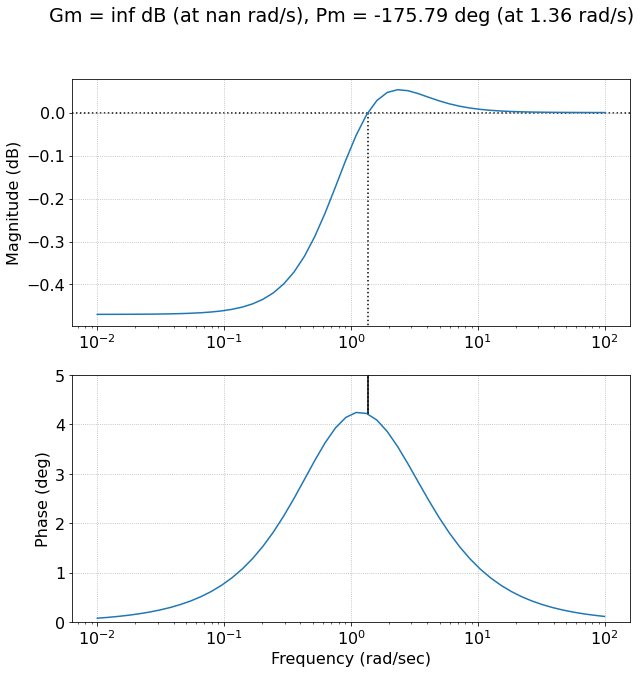

TransferFunction(array([ 1. , -1.1, -1.8]), array([ 2. , -2. , -3.7]))

In [2]:
s = tf([1, 0], [0, 1])
G = (s + 1) / (s - 2)
G_true = (s + 0.9) / (s - 1.9)

K = 1 / G
L = K * G_true

gm, pm, wg, wp = margin(L)

fig = plt.figure(figsize=(10, 10))
mags, phases, omegas = bode(L, dB=True, margins=True)

ax = fig.axes[0]
ax.grid(True, linestyle='dotted')

ax = fig.axes[1]
ax.grid(True, linestyle='dotted')
ymax = np.ceil(np.degrees(max(phases)))
ax.set_ylim(0, ymax)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

CL = feedback(L, 1)
CL